<a href="https://colab.research.google.com/github/RogSwoyam45/CNN_CAT_DOG/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
#!/bin/bash
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [24]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [25]:
def normal(image ,label):
  image = tf.cast(image/255. ,tf.float32)
  return image ,label

train_ds = train_ds.map(normal)
test_ds = test_ds.map(normal)

In [26]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [28]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 86ms/step - accuracy: 0.5634 - loss: 2.0916 - val_accuracy: 0.6588 - val_loss: 0.6312
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.6875 - loss: 0.5988 - val_accuracy: 0.7358 - val_loss: 0.5522
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7628 - loss: 0.4971 - val_accuracy: 0.6166 - val_loss: 1.1688
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.7995 - loss: 0.4419 - val_accuracy: 0.7260 - val_loss: 0.5554
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8375 - loss: 0.3690 - val_accuracy: 0.8160 - val_loss: 0.4152
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8737 - loss: 0.2926 - val_accuracy: 0.8188 - val_loss: 0.4730
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9063 - loss: 0.2215 - val_accuracy: 0.7874 - val_loss: 0.5526
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9338 - loss: 0.1638 - 

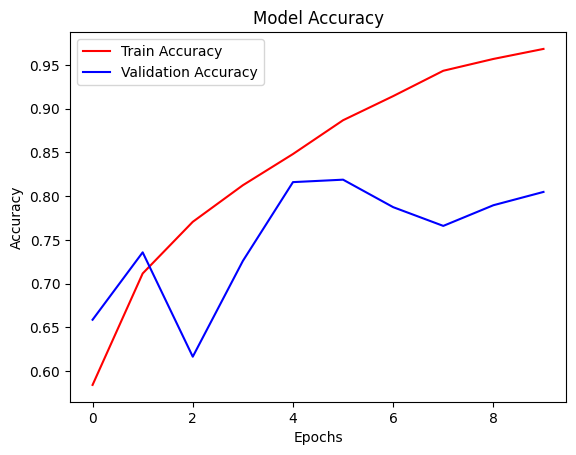

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

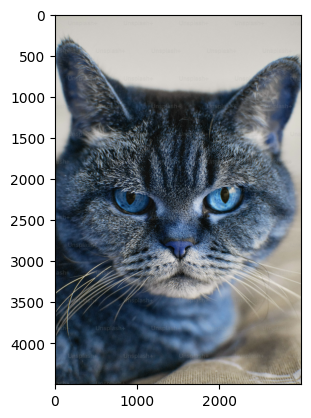

In [30]:
import cv2

test_img1 = cv2.imread('/content/test1.jpeg')
plt.imshow(test_img1)



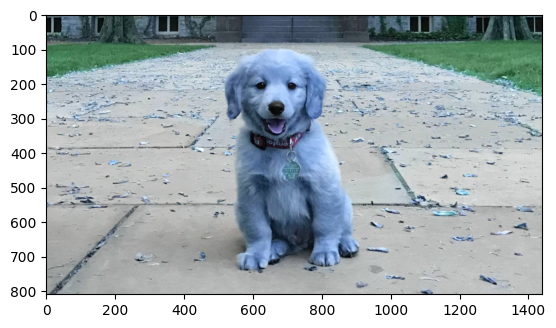

In [31]:
test_img2 = cv2.imread('/content/test2.jpg')
plt.imshow(test_img2 )

In [32]:
test_img1.shape
test_img2.shape

(810, 1440, 3)

In [33]:
test_img1 = cv2.resize(test_img1,(256,256))
test_img1 = test_img1.reshape((1,256,256,3))

test_img2 = cv2.resize(test_img2,(256,256))
test_img2 = test_img2.reshape((1,256,256,3))

In [34]:
result1 = model.predict(test_img1)
result2 = model.predict(test_img2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [36]:
if not result1:
  print("1st image is dog")
else:
  print("1st image is cat")


1st image is dog


In [37]:
if not result2:
  print("2nd image is dog")
else:
  print("2nd image is cat")

2nd image is cat
